In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
import pandas as pd

# Try reading the CSV file with different encodings
try:
    df = pd.read_csv('UpdatedResumeDataSet.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('UpdatedResumeDataSet.csv', encoding='latin1')
    except UnicodeDecodeError:
        df = pd.read_csv('UpdatedResumeDataSet.csv', encoding='ISO-8859-1')


In [127]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ R ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [128]:
df.shape

(962, 2)

# Exploring Categories

In [129]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

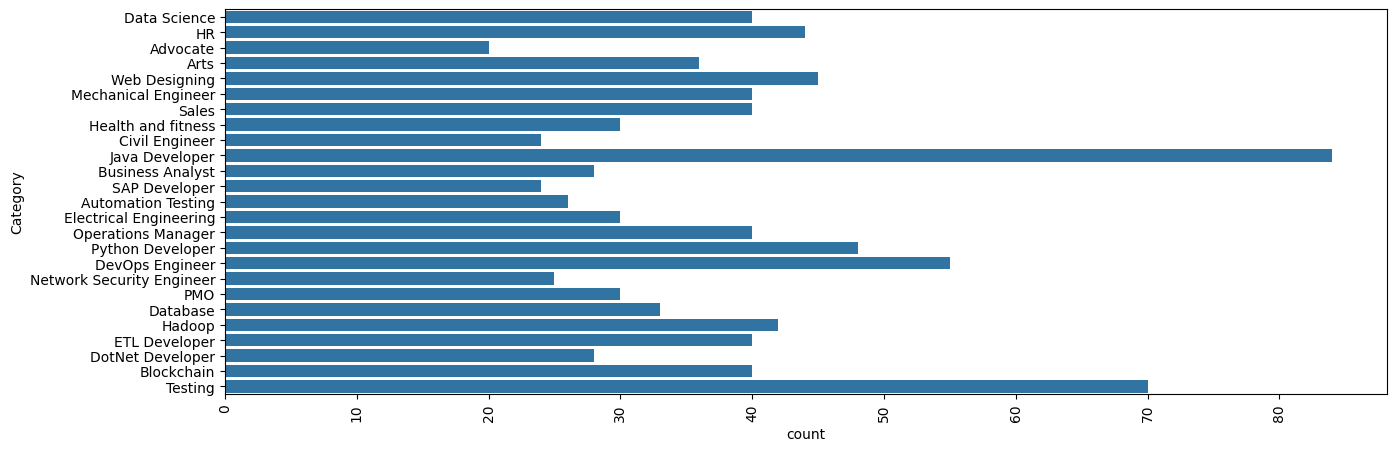

In [130]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

In [131]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

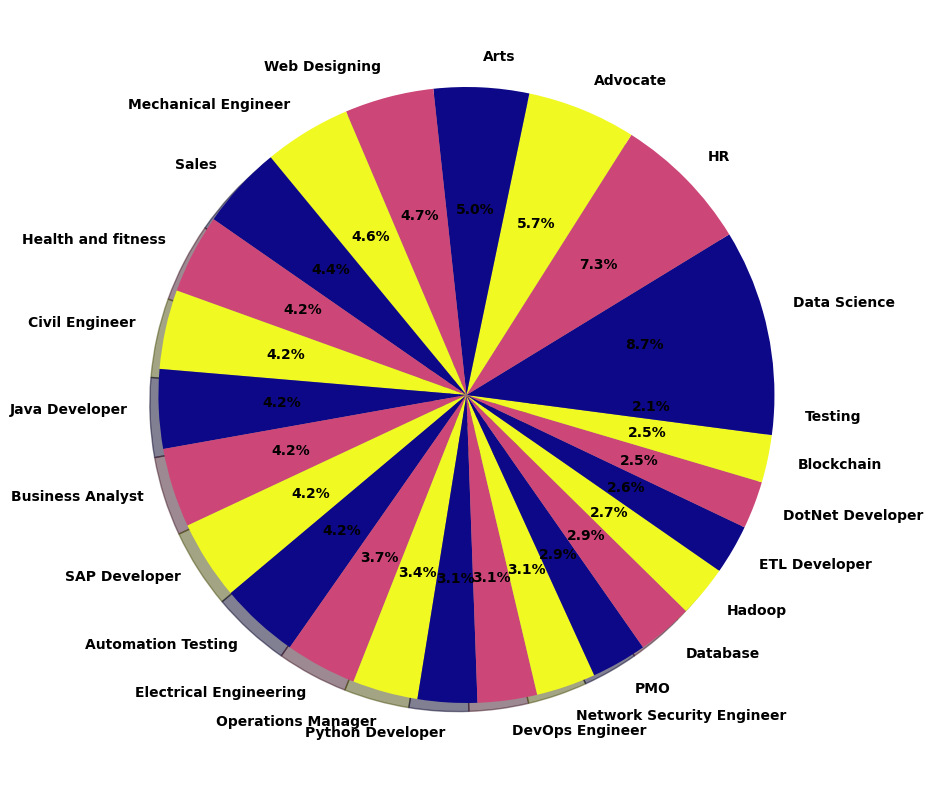

In [135]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)), textprops={'fontweight': 'bold'})
plt.show()

# Exploring Resume

In [ ]:
df['Category'][0]

'Data Science'

In [ ]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, Naï¿½ï¿½ï¿½ï¿½ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud In

# Cleaning Data:                                      
1 URLs,                                                
2 hashtags,                                             
3 mentions,                                                     
4 special letters,                                             
5 punctuations:                                             

In [ ]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\\S+\\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\\S+\\s', ' ', cleanText)
    cleanText = re.sub('@\\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\\s+', ' ', cleanText)
    return cleanText

In [ ]:
cleanResume("my #### $ #  #shashwat website is this http://helloworld and mail is @gmail.com")

'my website is this and mail is '

In [ ]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [ ]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services AssuranceLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the review 

# words into categorical values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [ ]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [ ]:
# ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#       dtype=object)

# Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requredTaxt  = tfidf.transform(df['Resume'])

# Splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(requredTaxt, df['Category'], test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(769, 7396)

In [ ]:
X_test.shape

(193, 7396)

# Now let’s train the model and print the classification report:

            Classifier  Training Time (s)  Accuracy  Precision    Recall  \
0                  KNN           0.036545  0.974093   0.979634  0.974093   
1        Decision Tree           0.342496  0.994819   0.995217  0.994819   
2        Random Forest           4.365379  0.984456   0.986584  0.984456   
3             AdaBoost          10.358531  0.994819   0.995123  0.994819   
4  Logistic Regression           0.248381  0.994819   0.995466  0.994819   
5                  SVM           3.035271  0.994819   0.995466  0.994819   

   F1 Score  
0  0.973792  
1  0.994826  
2  0.982341  
3  0.994801  
4  0.994895  
5  0.994895  


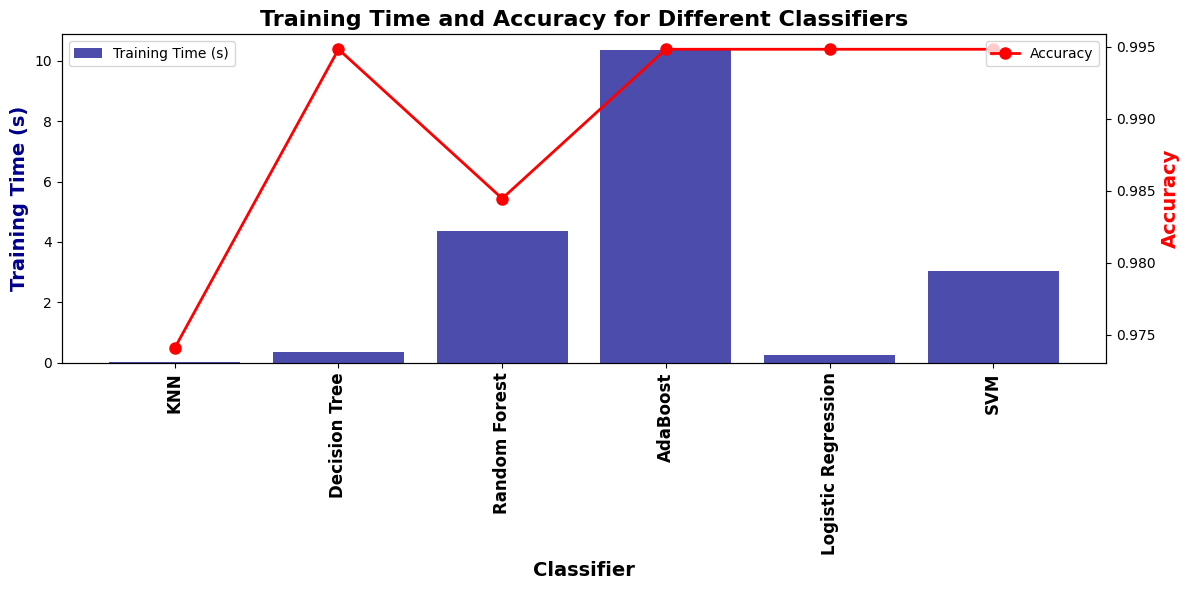

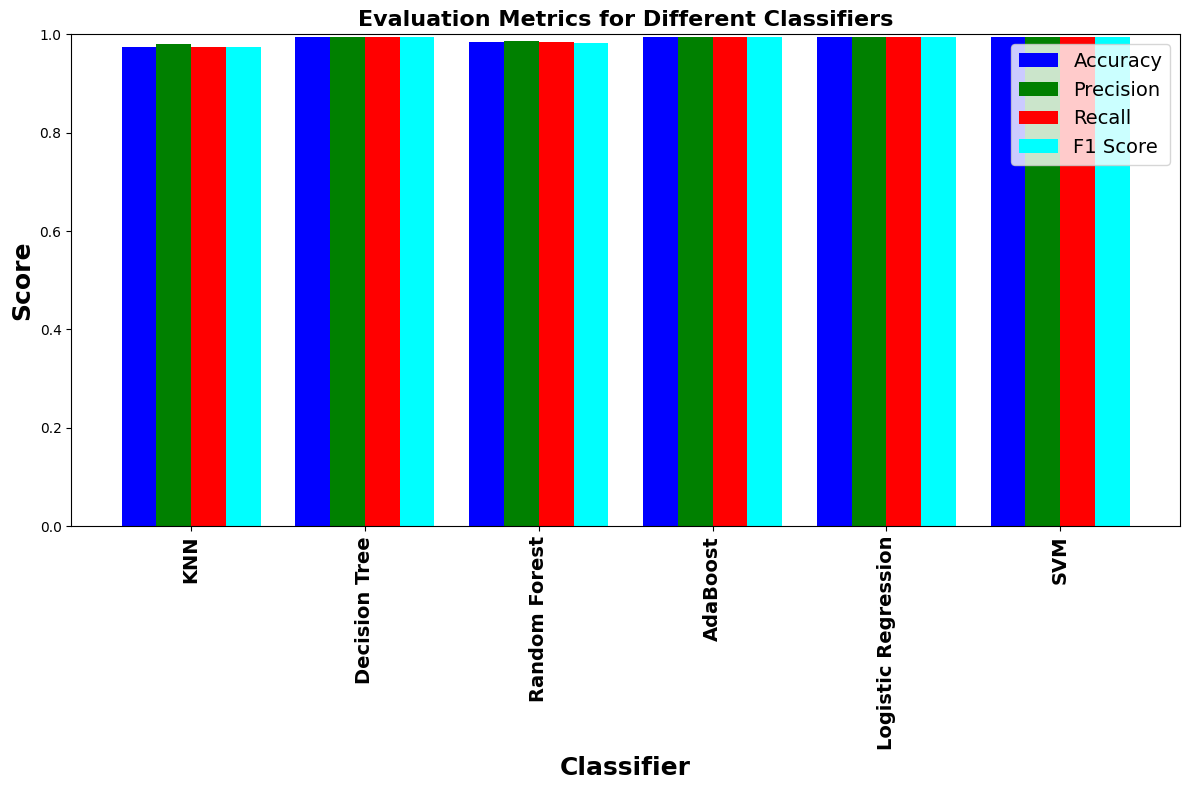

Results Table:
         Classifier  Training Time (s)  Accuracy  Precision   Recall  F1 Score
                KNN           0.036545  0.974093   0.979634 0.974093  0.973792
      Decision Tree           0.342496  0.994819   0.995217 0.994819  0.994826
      Random Forest           4.365379  0.984456   0.986584 0.984456  0.982341
           AdaBoost          10.358531  0.994819   0.995123 0.994819  0.994801
Logistic Regression           0.248381  0.994819   0.995466 0.994819  0.994895
                SVM           3.035271  0.994819   0.995466 0.994819  0.994895


In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# List of classifiers to evaluate
classifiers = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(algorithm='SAMME'),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC()
}

results = []

for name, classifier in classifiers.items():
    # Measure the training time
    start_time = time.time()
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Make predictions
    ypred = clf.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, ypred)
    precision = precision_score(y_test, ypred, average='weighted')
    recall = recall_score(y_test, ypred, average='weighted')
    f1 = f1_score(y_test, ypred, average='weighted')
    
    # Store the results
    results.append({
        "Classifier": name,
        "Training Time (s)": training_time,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Store the results in a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)

# Define colors for each classifier
bar_color = 'darkblue'
line_color = 'red'

# Plot Training Time and Accuracy on the same graph with dual y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()
ax1.bar(results_df['Classifier'], results_df['Training Time (s)'], color=bar_color, alpha=0.7, label='Training Time (s)')
ax2.plot(results_df['Classifier'], results_df['Accuracy'], color=line_color, marker='o', linestyle='-', label='Accuracy', linewidth=2, markersize=8)

ax1.set_xlabel('Classifier', fontsize=14, fontweight='bold', color='black')
ax1.set_ylabel('Training Time (s)', fontsize=14, fontweight='bold', color=bar_color)
ax2.set_ylabel('Accuracy', fontsize=14, fontweight='bold', color=line_color)
ax1.set_title('Training Time and Accuracy for Different Classifiers', fontsize=16, fontweight='bold')

ax1.set_xticks(range(len(results_df['Classifier'])))
ax1.set_xticklabels(results_df['Classifier'], rotation=90, fontsize=12, fontweight='bold', color='black')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Remove grid lines
ax1.grid(False)
ax2.grid(False)

plt.tight_layout()
plt.show()

# Plot Accuracy, Precision, Recall, and F1 Score
plt.figure(figsize=(12, 8))
x = range(len(results_df['Classifier']))

bar_width = 0.2  # width of the bars

plt.bar(x, results_df['Accuracy'], width=bar_width, label='Accuracy', color='blue', align='center')
plt.bar([p + bar_width for p in x], results_df['Precision'], width=bar_width, label='Precision', color='green', align='center')
plt.bar([p + 2 * bar_width for p in x], results_df['Recall'], width=bar_width, label='Recall', color='red', align='center')
plt.bar([p + 3 * bar_width for p in x], results_df['F1 Score'], width=bar_width, label='F1 Score', color='cyan', align='center')

plt.xlabel('Classifier', fontsize=18, fontweight='bold', color='black')
plt.ylabel('Score', fontsize=18, fontweight='bold', color='black')
plt.title('Evaluation Metrics for Different Classifiers', fontsize=16, fontweight='bold')
plt.xticks([p + 1.5 * bar_width for p in x], results_df['Classifier'], rotation=90, fontsize=14, fontweight='bold', color='black')
plt.ylim(0, 1)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

# Display the results in a table format
print("Results Table:")
print(results_df.to_string(index=False))


In [ ]:
ypred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23,  6, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20,  6,  6,  7, 23])

# Prediction System

In [ ]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))


In [ ]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

In [ ]:
import pickle

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

#  category namMap category ID toe
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)


Predicted Category: Data Science
6
